# Regressão Linear e Polinomial

Nesse notebook apresenta os tipos de regressão com exemplos.

Regressão linear relaciona os dados, criando uma interpolação entre eles. Ou seja,quando se tem valores independetes (x1,x2,...,xn) e você tenta estimar uma variável dependente y através de uma equação linear.



<img src ="imgs/regressao_linear_simples.png">

Para conseguir estimar os valores y, o algoritmo cria uma função genérica e coloca pesos nas variáveis independentes. Essas estimativas gerarão erros pois a reta não passará em todos os pontos de y com precisão. O algoritmo tenta reduzir ao máximo o valor dos erros através do gradiente descendente.

Esses erros são calculado através das funções de erros. Nesse notebook usaremos a Média Quadrada.

O gradiente descente é obtido através da derivada da função de erro(lossFunc) em relação aos valores das variáveis independentes. Ele é atrelado à taxa de aprendizagem. O gradiente mostrará o caminho da função onde o erro é menor, a taxa de aprendizagem é o tamanho do passo que a função dará na direção dele.

$$ erro := erro - lr*\dfrac{\partial}{\partial\theta}(lossFunc)  $$

Dessa forma teremos os novos valores atrelados às variáveis independentes

<img src="imgs/gradiente.png">

Portanto o algoritmo estima, gera os erros, encontra o gradiente descendente, e encontra uma nova função onde o erro é menor.

## Aplicações

In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np

## Regressão Linear Simples

Possui apenas uma variável independente

$$ Y = aX + b $$

Estima-se uma equação com apenas uma variável

### Problema

Problema foi estraido de <a href= "https://pt.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/introduction-to-trend-lines/a/equations-of-trend-lines-phone-data">KhanAcademy</a>:

Paula coletou dados sobre quanto tempo ela passou no telefone comparado a quanta bateria restava (em horas) ao longo do dia. Aqui estão os dados que ela obteve:

$$
\begin{matrix}
Tempo & 1 & 2 & 3,5 & 4 & 6 & 7 & 8 & 9 \\
Bateria & 8 & 7 & 7 & 5,5 & 5 & 3,5 & 2,5 & 2,5
\end{matrix}
$$

Vamos aplicar o algoritmo de regressão linear simples e encontrar a melhor linha de tendência entre eles.

In [2]:
# Tensor tempo
y_ls = torch.tensor([8,7,7,5.5,5,3.5,2.5,2.5])
x_ls = torch.tensor([1,2,3.5,4,6,7,8,9])


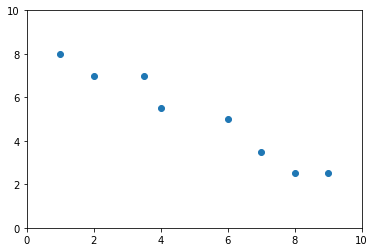

In [3]:
fig, ax = plt.subplots()
ax.scatter(x_ls, y_ls)
ax.set(xlim=(0, 10),
       ylim=(0, 10))
plt.show()

In [4]:
from torch.utils.data import TensorDataset
train_ds = TensorDataset(x_ls, y_ls)

In [5]:
model = torch.nn.Linear(1,1) # Modelo de regressão
batch_size = 1

In [6]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [7]:
model1 = torch.nn.Linear(1,1) # Modelo de regressão
loss_fn = torch.nn.MSELoss() # Funçao de perda
opt = torch.optim.SGD(model.parameters(), lr=1e-2) # Otimizador, com gradiente

In [8]:
def train(nEpochs = 5, model):
    errors_train = []
    for epoch in range(nEpochs):
        train_loss = 0
        for x, y in train_dl:
            opt.zero_grad() # Zera o gradiente
            out = model(x) # Faz a predição

            loss = loss_fn(out, y) # Calcula o erro
            train_loss += loss.item() # Soma o erro em todas as variáveis
            loss.backward() # Calcula o gradiente
            opt.step() # Aplica o gradiente
        errors_train.append(train_loss)
        if (not epoch%10):
            print(f"Epochs: {epoch}, error train: {errors_train[-1]}")
    return errors_train

In [9]:
erro = train(100, model1)

Epochs: 0, error train: 179.37222677469254
Epochs: 10, error train: 70.09282956644893
Epochs: 20, error train: 33.893654584884644
Epochs: 30, error train: 17.933066710829735
Epochs: 40, error train: 10.531042615417391
Epochs: 50, error train: 5.2309103310108185
Epochs: 60, error train: 6.823947822413174
Epochs: 70, error train: 3.810775912948884
Epochs: 80, error train: 3.378644321113825
Epochs: 90, error train: 3.724305760115385


In [10]:
print(model(x_ls[[0]]))

tensor([7.9748], grad_fn=<AddBackward0>)


In [18]:
y_pred = []
for x in range(len(x_ls)):
    y_pred.append(model(x_ls[[x]]))

y_pred = [y_pred[x].item() for x in range(len(y_pred))]

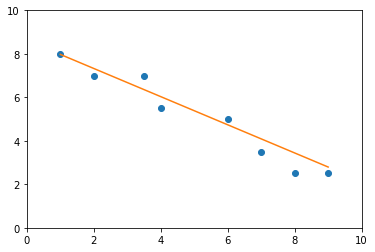

In [23]:
fig, ax = plt.subplots()
ax.set(xlim=(0, 10),
       ylim=(0, 10))
plt.plot(x_ls, y_ls, 'o')
plt.plot(x_ls, y_pred)

In [22]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.6475]], requires_grad=True), Parameter containing:
tensor([8.6223], requires_grad=True)]


A função gerada foi 

$$Y = -0.6475X + 8.6223$$



## Regressão Polinomial
Diferente dos outros algoritmos apresentados, esse cria uma função não linear. Muitos problemas não são lineares mas sim em forma de parabolas ou outras formas. Os algoritmos de regressão polinomial conseguem interpolar esses tipos de dados.

$$Y = a1X + a2X^2 + ... + anX^n + b$$


### Problema

Para esse algoritmo iremos usar dados gerados a partir da função

$$Y = \frac{X³}{5} - 2X² + 3X + B$$

Onde B é o ruído

Depois de gerar os valores reais poderemos ver a função que a regressão irá nos mostrar

In [52]:
x_rp = np.array([x for x in range(-15,15)])

In [86]:
# Criar valores de Y com algum ruído
y_rp = ((1/5*(x_rp*x_rp*x_rp)) - (2*(x_rp*x_rp)) + x_rp) + np.random.normal(10000, 70, 30)

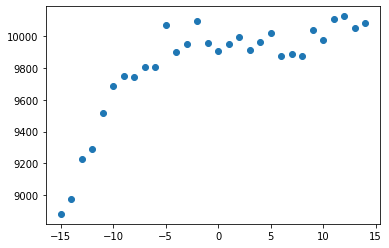

In [87]:
fig, ax = plt.subplots()
ax.scatter(x_rp, y_rp)
# ax.set(xlim=(0, 10),
#        ylim=(0, 10))
plt.show()

In [ ]:
train_ds_rp = 

Podemos tentar predizer com o modelo linear porém iremos perceber que o resultado será muito longe do esperado.